In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import  GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
%matplotlib inline


In [2]:
df = pd.read_csv('df_full_premierleague.csv', sep =',')

In [3]:
df = df.drop(['Unnamed: 0','link_match'], axis = 1)

In [4]:
df.head(10)

,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,home_fouls_conceded,home_offsides,...,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away
0,10/11,2010-11-01,Blackpool,West Bromwich Albion,2-1,1-0,15.0,8.0,16.0,2.0,...,20.0,584.9,1.6,1.44,1.67,-2.0,0.33,0.78,-4.0,55.6
1,10/11,2011-04-11,Liverpool,Manchester City,3-0,3-0,16.0,6.0,6.0,5.0,...,22.0,681.4,2.0,1.61,0.87,23.0,0.87,0.32,17.0,60.2
2,10/11,2010-12-13,Manchester United,Arsenal,1-0,1-0,26.0,5.0,9.0,3.0,...,21.2,748.0,1.8,2.12,1.12,16.0,0.94,0.38,9.0,66.7
3,10/11,2010-09-13,Stoke City,Aston Villa,2-1,0-1,26.0,8.0,12.0,2.0,...,25.0,567.3,2.0,1.33,2.00,-2.0,1.00,1.00,0.0,66.7
4,10/11,2011-02-14,Fulham,Chelsea,0-0,0-0,50.0,4.0,11.0,1.0,...,19.4,728.6,1.4,1.84,0.88,24.0,0.84,0.48,9.0,58.7
5,10/11,2010-08-16,Manchester United,Newcastle United,3-0,2-0,15.0,5.0,9.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10/11,2010-10-18,Blackburn Rovers,Sunderland,0-0,0-0,30.0,5.0,12.0,6.0,...,22.0,554.3,1.4,1.00,1.00,0.0,0.29,0.29,0.0,38.1
7,10/11,2010-12-20,Manchester City,Everton,1-2,0-2,9.0,10.0,10.0,2.0,...,21.4,630.5,1.3,1.06,1.18,-2.0,0.41,0.65,-4.0,35.3
8,10/11,2010-11-22,Sunderland,Everton,2-2,1-1,44.0,4.0,6.0,2.0,...,19.8,638.8,1.0,1.08,1.00,1.0,0.38,0.54,-2.0,38.5
9,10/11,2010-08-23,Manchester City,Liverpool,3-0,1-0,24.0,5.0,13.0,1.0,...,30.0,531.0,1.0,1.00,1.00,0.0,0.00,0.00,0.0,33.3


In [5]:
array = df['result_full'].unique()

In [6]:
array_ht = df['result_ht'].unique()

In [7]:
## Convertendo a informação de result_full em variável numérica

lista = []
for i in range(len(array)):
    placar_mandante = array[i].split('-')[0]
    placar_visitante = array[i].split('-')[1]
    if placar_mandante > placar_visitante:
        resultado = {array[i]: 1}
    elif placar_mandante == placar_visitante:
        resultado = {array[i]: 0}
    elif placar_mandante < placar_visitante:
        resultado = {array[i]: 2}
    lista.append(resultado)

In [8]:
from collections import ChainMap
df['result_full'] = df['result_full'].map(dict(ChainMap(*lista)))


In [9]:
## Convertendo a informação de result_ht em variável numérica


lista = []
for i in range(len(array_ht)):
    placar_mandante = array_ht[i].split('-')[0]
    placar_visitante = array_ht[i].split('-')[1]
    if placar_mandante > placar_visitante:
        resultado = {array_ht[i]: 1}
    elif placar_mandante == placar_visitante:
        resultado = {array_ht[i]: 0}
    elif placar_mandante < placar_visitante:
        resultado = {array_ht[i]: 2}
    lista.append(resultado)

In [10]:
df['result_ht'] = df['result_ht'].map(dict(ChainMap(*lista)))


In [11]:
## 0 -> EMPATE
## 1 -> VITORIA MANDANTE
## 2 -> VITORIA VISITANTE

In [12]:
empate = len(df[df['result_full'] == 0])
vitoria_mandante = len(df[df['result_full'] == 1])
vitoria_visitante = len(df[df['result_full'] == 2])

p_empate = round(empate/len(df)*100, 2)
p_vm = round(vitoria_mandante/len(df)*100, 2)
p_vv = round(vitoria_visitante/len(df)*100, 2)

In [13]:
print(f'% Empate = {p_empate}% \n% Vitoria Mandante = {p_vm}% \n% Vitoria Visitante = {p_vv}%')

% Empate = 24.57% 
% Vitoria Mandante = 45.09% 
% Vitoria Visitante = 30.34%


C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, '')

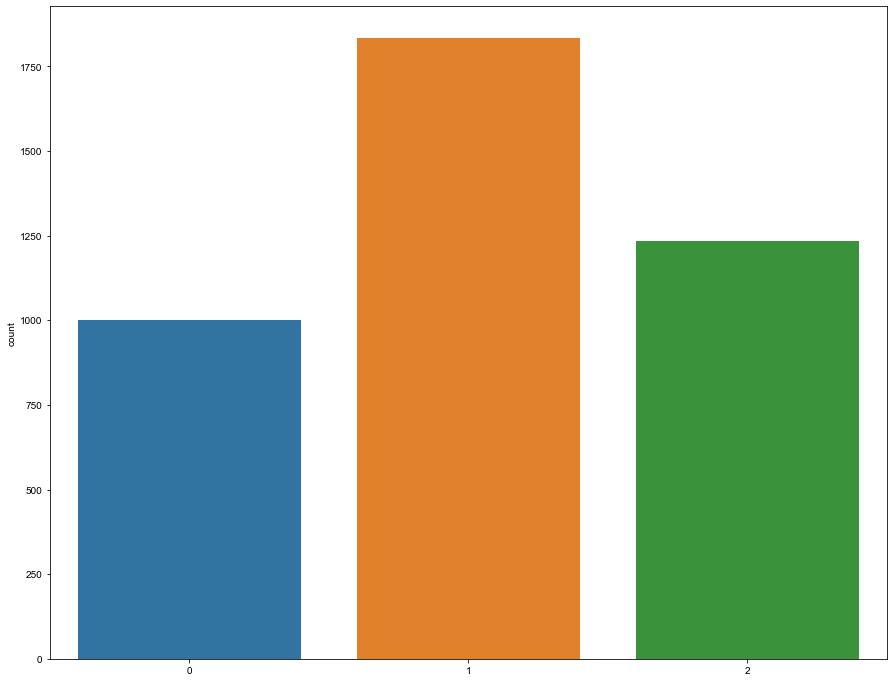

In [14]:
plt.figure(figsize = (15,12))
sns.countplot(df['result_full'])
sns.set(style = 'darkgrid')
plt.xlabel('')

In [15]:
features = df.drop('result_full', axis=1)
labels = df['result_full']

In [16]:
## Retirando variáveis não numéricas

features = features.drop(['season', 'date','home_team', 'away_team'], axis = 1)

In [17]:
features = features.fillna(0)

In [18]:
features_list = ['tackles_avg_away','home_clearances','home_shots_on_target','goals_conced_ft_avg_away','sg_match_ht_acum_away','home_possession', 'yellow_cards_avg_away', 'home_corners', 'home_red_cards', 'performance_acum_away', 'home_shots', 'goals_scored_ft_avg_away']

k_best_features = SelectKBest(k = 'all')
k_best_features.fit_transform(features,labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:50])
best_features = k_best_features_final.keys()
print ('')
print ("Melhores features:")
print (k_best_features_final)


Melhores features:
{'home_shots': 416.99229044713536, 'home_clearances': 248.98075404639715, 'performance_acum_away': 106.01060763446617, 'yellow_cards_avg_away': 58.90715310053206, 'home_shots_on_target': 54.258889126821614, 'home_corners': 41.23502033923686, 'home_red_cards': 35.52012258514549, 'goals_conced_ft_avg_away': 11.983029529502339, 'sg_match_ht_acum_away': 5.500941183168989, 'home_possession': 4.429870428703078, 'goals_scored_ft_avg_away': 0.7954046072903772}


In [19]:
features = df[['tackles_avg_away','home_clearances','home_shots_on_target','goals_conced_ft_avg_away', 'yellow_cards_avg_away', 'home_corners', 'home_red_cards', 'performance_acum_away', 'home_shots', ]]

In [20]:
features.fillna(0)

,tackles_avg_away,home_clearances,home_shots_on_target,goals_conced_ft_avg_away,yellow_cards_avg_away,home_corners,home_red_cards,performance_acum_away,home_shots
0,20.0,15.0,5.0,1.67,1.6,8.0,0.0,55.6,26.0
1,22.0,16.0,5.0,0.87,2.0,6.0,0.0,60.2,21.0
2,21.2,26.0,6.0,1.12,1.8,5.0,0.0,66.7,17.0
3,25.0,26.0,9.0,2.00,2.0,8.0,0.0,66.7,21.0
4,19.4,50.0,5.0,0.88,1.4,4.0,0.0,58.7,13.0
...,...,...,...,...,...,...,...,...,...
4065,16.8,15.0,1.0,1.38,1.5,5.0,0.0,33.3,11.0
4066,17.7,13.0,7.0,1.15,1.8,5.0,0.0,62.8,12.0
4067,14.9,25.0,2.0,1.23,1.6,4.0,0.0,64.1,8.0
4068,13.3,47.0,2.0,1.08,1.7,2.0,1.0,54.2,9.0


In [21]:
col_mask=features.isnull().any(axis=0) 
col_mask

tackles_avg_away             True
home_clearances             False
home_shots_on_target        False
goals_conced_ft_avg_away     True
yellow_cards_avg_away        True
home_corners                False
home_red_cards              False
performance_acum_away        True
home_shots                  False
dtype: bool

In [22]:
features.isnull().sum().sum()

440

In [23]:
features = features.fillna(0)

In [24]:
features = features.reset_index(drop= True)

In [25]:
scaler = MinMaxScaler().fit(features)
features_scaler = scaler.fit_transform(features)
features_scaler

array([[0.58823529, 0.20547945, 0.29411765, ..., 0.        , 0.556     ,
        0.59090909],
       [0.64705882, 0.21917808, 0.29411765, ..., 0.        , 0.602     ,
        0.47727273],
       [0.62352941, 0.35616438, 0.35294118, ..., 0.        , 0.667     ,
        0.38636364],
       ...,
       [0.43823529, 0.34246575, 0.11764706, ..., 0.        , 0.641     ,
        0.18181818],
       [0.39117647, 0.64383562, 0.11764706, ..., 0.5       , 0.542     ,
        0.20454545],
       [0.38529412, 0.71232877, 0.11764706, ..., 0.        , 0.711     ,
        0.18181818]])

In [26]:
len(features)*0.75
len(features)


4070

In [27]:
len(features_scaler)

4070

In [28]:
X_train = features_scaler[:2970]
X_test = features_scaler[2970:3860]
y_train = labels[:2970]
y_test = labels[2970:3860]

In [29]:
print ('LogisticRegression')


clf_LR = LogisticRegression(multi_class='multinomial',max_iter=2000)
clf_LR.fit(X_train, y_train)
pred= clf_LR.predict(X_test)

lg_acc = accuracy_score(y_test, pred)
f1=f1_score(y_test,pred,average = 'micro')
print ('Acurácia LogisticRegression:{}'.format(lg_acc))
print ('F1 Score:{}'.format(f1) )

LogisticRegression
Acurácia LogisticRegression:0.5719101123595506
F1 Score:0.5719101123595506


In [30]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid)

search.fit(X_train,y_train)
clf = search.best_estimator_
pred= clf.predict(X_test)
lg_acc = accuracy_score(y_test, pred)


f1=f1_score(y_test,pred,average = 'macro')

print ('Acurácia LogisticRegression:{}'.format(lg_acc))
print ('F1 Score:{}'.format(f1) )

print (clf)

Acurácia LogisticRegression:0.5685393258426966
F1 Score:0.44581830787162274
LogisticRegression(C=10, max_iter=1000)


In [31]:
print ('SVC')


clf = SVC()
clf.fit(X_train, y_train)
pred= clf.predict(X_test)

svc_acc = accuracy_score(y_test, pred)
f1=f1_score(y_test,pred, average='micro')
print ('Acurácia SVC:{}'.format(svc_acc))
print ('F1 Score:{}'.format(f1) )

SVC
Acurácia SVC:0.5831460674157304
F1 Score:0.5831460674157304


In [32]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

search = GridSearchCV(SVC(), param_grid)

search.fit(X_train,y_train)
clf_SVC = search.best_estimator_
pred= clf_SVC.predict(X_test)
acc = accuracy_score(y_test, pred)


f1=f1_score(y_test,pred,average = 'micro')

print ('F1 Score:{}'.format(f1))

print ('Acurácia LogisticRegression:{}'.format(acc))

print(clf_SVC)

F1 Score:0.5831460674157304
Acurácia LogisticRegression:0.5831460674157304
SVC(C=1)


In [33]:
print ('Decision Tree')


clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred= clf.predict(X_test)

dt_acc = accuracy_score(y_test, pred)
f1=f1_score(y_test,pred, average='macro')
print ('Acurácia Tree:{}'.format(dt_acc))
print ('F1 Score:{}'.format(f1) )


n_estimators = [10, 50, 100, 200]
max_depth = [3, 10, 20, 40]

Decision Tree
Acurácia Tree:0.44719101123595506
F1 Score:0.4190088543506221


In [34]:
print ('Decision Tree')

param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]
    
  
}

search = GridSearchCV(DecisionTreeClassifier(), param_grid)

search.fit(X_train,y_train)
clf = search.best_estimator_
pred= clf.predict(X_test)
dt_acc = accuracy_score(y_test, pred)


f1=f1_score(y_test,pred,average = 'micro')

print ('Acurácia Decision Tree:{}'.format(dt_acc))
print ('F1 Score:{}'.format(f1) )

print (clf)

Decision Tree
Acurácia Decision Tree:0.42921348314606744
F1 Score:0.42921348314606744
DecisionTreeClassifier(max_depth=110, max_features=3, min_samples_leaf=5,
                       min_samples_split=12)


In [35]:
print ('Naive baeys')


clf = GaussianNB()
clf.fit(X_train, y_train)
pred= clf.predict(X_test)

nb_acc = accuracy_score(y_test, pred)
f1=f1_score(y_test,pred, average='micro')
print ('Acurácia Naive baeys:{}'.format(nb_acc))
print ('F1 Score:{}'.format(f1) )

Naive baeys
Acurácia Naive baeys:0.5426966292134832
F1 Score:0.5426966292134832


In [36]:
len(labels)

4070

In [37]:
previsao=features_scaler[3860:]

game_id_full=df['season']
game_id=game_id_full[3860:]

res_full=df['result_full']
res=res_full[3860:]

season_full = df['season']
season = season_full[3860:]

date_full = df['date']
date = date_full[3860:]

time_mandante_full = df['home_team']
time_mandante = time_mandante_full[3860:]

time_visitante_full = df['away_team']
time_visitante = time_visitante_full[3860:]


pred=clf_LR.predict(previsao)

df_f=pd.DataFrame({'real': res, 'previsao':pred, 'Mandante':time_mandante,'Visitante': time_visitante,'Season': season, 'Data': date})

print(df_f)

      real  previsao           Mandante                 Visitante Season  \
3860     2         2        Southampton           Manchester City  20/21   
3861     1         1            Arsenal           West Ham United  20/21   
3862     1         1            Everton      West Bromwich Albion  20/21   
3863     1         1       Leeds United                    Fulham  20/21   
3864     2         2  Manchester United            Crystal Palace  20/21   
...    ...       ...                ...                       ...    ...   
4065     2         2          Liverpool  Brighton and Hove Albion  20/21   
4066     0         1            Burnley            Leicester City  20/21   
4067     0         2     Crystal Palace         Manchester United  20/21   
4068     1         2   Sheffield United               Aston Villa  20/21   
4069     0         0   Newcastle United                 Liverpool  20/21   

            Data  
3860  2020-12-19  
3861  2020-09-19  
3862  2020-09-19  
3863  2020-

<AxesSubplot:xlabel='previsao', ylabel='real'>

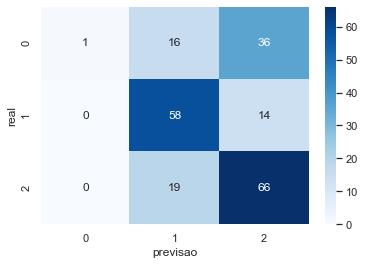

In [38]:
df=pd.DataFrame(df_f,columns=['real','previsao' ])

cf_matrix=pd.crosstab(df_f['real'], df_f['previsao'], rownames=['real'] , colnames=['previsao'])

sns.heatmap(cf_matrix, annot=True, cmap='Blues')

In [39]:
df_f.head(30)

,real,previsao,Mandante,Visitante,Season,Data
3860,2,2,Southampton,Manchester City,20/21,2020-12-19
3861,1,1,Arsenal,West Ham United,20/21,2020-09-19
3862,1,1,Everton,West Bromwich Albion,20/21,2020-09-19
3863,1,1,Leeds United,Fulham,20/21,2020-09-19
3864,2,2,Manchester United,Crystal Palace,20/21,2020-09-19
3865,0,2,Brighton and Hove Albion,Wolverhampton Wanderers,20/21,2021-01-02
3866,1,1,Crystal Palace,Sheffield United,20/21,2021-01-02
3867,1,1,Tottenham Hotspur,Leeds United,20/21,2021-01-02
3868,2,2,West Bromwich Albion,Arsenal,20/21,2021-01-02
3869,0,2,Burnley,West Bromwich Albion,20/21,2021-02-20
